In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,forest,gradient_boosting,RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.feature_selection import f_classif,SelectKBest
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Initializing the dataframe
data=pd.read_csv(r'D:\Datatrained\Machine Leaning\Ada boost\boston_house_rent.csv')


In [4]:
# see the head of data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# Any missing values
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [6]:
# Dataset analysis /stats using describe method
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# finding out the correlation between the features
corr=data.corr()
corr.shape

(14, 14)

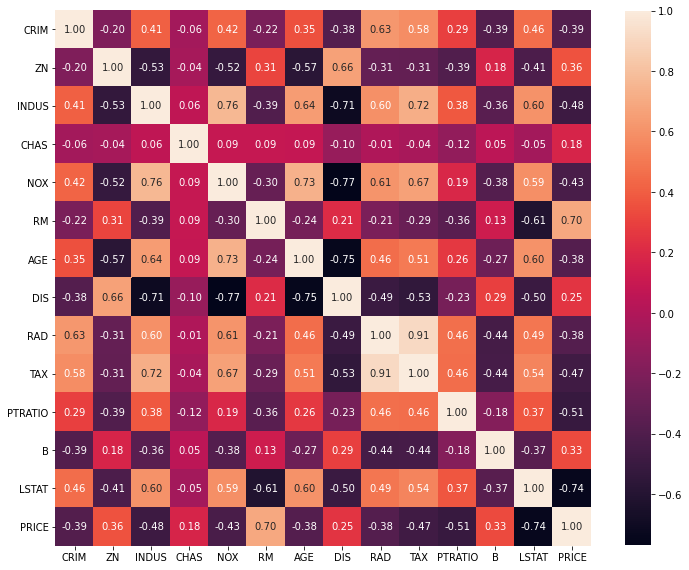

In [15]:
# plotting the heatmap of correlation between the features
plt.figure(figsize=(12,12))
           
sns.heatmap(corr,cbar=True,square=True,cbar_kws={"shrink": .82},fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

In [ ]:
# check continueous and categorical features if correlation is greater than .9
# check logical correlation like age and income tax etc


In [ ]:
# seems RAD and TAX are corelated.Lets check with the scatter plot

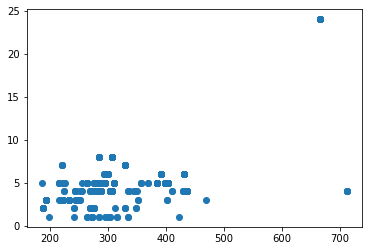

In [16]:
plt.scatter(data.TAX,data.RAD)
plt.show()

In [ ]:
# dividing the features and label data

In [19]:
X=data.drop(columns=['PRICE'],axis=1)
y=data['PRICE']

In [20]:
# train test split hold out method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=41)

In [21]:
from sklearn.ensemble import AdaBoostRegressor

In [22]:
ada =AdaBoostRegressor()

In [23]:
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [24]:
# Model prediction on train data
y_pred=ada.predict(X_train)

In [27]:
from sklearn.metrics import r2_score
print('R square score',r2_score(y_train,y_pred))

R square score 0.9135805616400504


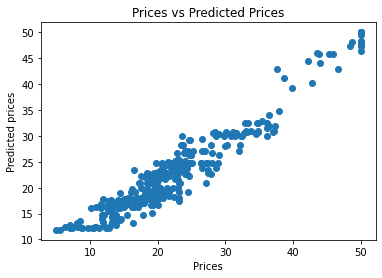

In [28]:
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted Prices")
plt.show()

In [29]:
# Predicting test data with the model
y_test_pred=ada.predict(X_test)

In [30]:
# mOdel evaluation
accuracy=r2_score(y_test,y_test_pred)
print('R square score:',accuracy)

R square score: 0.8012537726213207


In [31]:
# Hyper parameter Tuning using RandomizedsearchCV

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [33]:
df=DecisionTreeRegressor()

In [34]:
params ={'n_estimators':[40,47,49,50],'learning_rate':[0.30,0.40,0.45]}

In [35]:
rnd_srch =RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [36]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [37]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.45, n_estimators=40)

In [44]:
ada=AdaBoostRegressor(base_estimator=df,learning_rate=0.4,n_estimators=47)
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
print('*** accuracy post tuning***')
print(r2_score(y_test,y_pred))

*** accuracy post tuning***
0.8103969536808112
